In [1]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

import time      # for testing use only
import os         # for testing use only
import requests
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import pyppdf.patch_pyppeteer
import cloudscraper
import re
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
%matplotlib inline

# Crawling

In [2]:
url = 'https://www.hltv.org/stats/players?minMapCount='

In [3]:
def get_soup(entered_url):
    scraper = cloudscraper.create_scraper()
    response = scraper.get(entered_url)
    soup = BeautifulSoup(response.content,"html.parser")
    return soup

In [4]:
def get_link(table):
    links = list()
    for link in table:
        cells=link.td.a.get('href')
        link='https://www.hltv.org' +cells
        links.append(link)
    return links

In [5]:
def get_num(div_item):
    if len(div_item) == 0:
        return None
    num = re.sub('[^0-9\.]','', div_item.text)
    float_num = float(num)
    return float_num

In [6]:
def get_player_dataDF(links):
    Player_name = list()
    Player_age = list()
    Total_kills = list()
    Headshot = list()
    Total_deaths = list()
    Kill_deaths = list()
    Damage_in_Round = list()
    Grenade_dmg_in_Round = list()
    Maps_played = list()
    Rounds_played = list()
    Kills_in_round = list()
    Assists_in_round = list()
    Deaths_in_round = list()
    Saved_by_teammate_in_round = list()
    Saved_teammates_in_round = list()
    Rating = list()
    for link in links:
        soup = get_soup(link)
        player = soup.find_all('div',{'class':'stats-row'})
        if len(player)<14:
            continue
        #### Player details AGE and NAME
        Player_name.append(soup.find('h1',{'class':'summaryNickname text-ellipsis'}).text)
        #print(f'Player name :',soup.find('h1',{'class':'summaryNickname text-ellipsis'}).text) # just print name
        Player_age.append(get_num(soup.find('div',{'class':'summaryPlayerAge'})))
        ####    
        Total_kills.append(player[0].find_next('span').find_next('span').text)
        Headshot.append((player[1].find_next('span').find_next('span').text))
        Total_deaths.append((player[2].find_next('span').find_next('span').text))
        Kill_deaths.append((player[3].find_next('span').find_next('span').text))
        Damage_in_Round.append((player[4].find_next('span').find_next('span').text))
        Grenade_dmg_in_Round.append((player[5].find_next('span').find_next('span').text))
        Maps_played.append((player[6].find_next('span').find_next('span').text))
        Rounds_played.append((player[7].find_next('span').find_next('span').text))
        Kills_in_round.append((player[8].find_next('span').find_next('span').text))
        Assists_in_round.append((player[9].find_next('span').find_next('span').text))
        Deaths_in_round.append((player[10].find_next('span').find_next('span').text))
        Saved_by_teammate_in_round.append((player[11].find_next('span').find_next('span').text))
        Saved_teammates_in_round.append((player[12].find_next('span').find_next('span').text))
        Rating.append((soup.find('span',{'class':'strong'}).text))
        
    
    df = pd.DataFrame({'player_name':Player_name,'player_age':Player_age,'Total_kills':Total_kills,
                       'Headshot_in_%':Headshot,'Total_deaths':Total_deaths,'Kills_deaths':Kill_deaths,
                       'Damage_in_Round':Damage_in_Round,'Grenade_dmg_in_Round':Grenade_dmg_in_Round,'Maps_played':Maps_played,
                       'Rounds_played':Rounds_played,'Kills_in_round':Kills_in_round,'Assists_in_round':Assists_in_round,
                       'Deaths_in_round':Deaths_in_round,'Saved_by_teammate_in_round':Saved_by_teammate_in_round,
                        'Saved_teammates_in_round':Saved_teammates_in_round,'Rating':Rating})
    return df
    #print(len(Player_name))
    #print(len(Player_age))
    #print(len(Total_kills))
    #print(len(Headshot))
    #print(len(Total_deaths))
    #print(len(Damage_in_Round))
    #print(len(Grenade_dmg_in_Round))
    #print(len(Maps_played))
    #print(len(Rounds_played))
    #print(len(Kills_in_round))
    #print(len(Assists_in_round))
    #print(len(Deaths_in_round))
    #print(len(Saved_by_teammate_in_round))
    #print(len(Saved_teammates_in_round))
    #print(len(Rating))
    #print(player)
        

    

In [7]:
links = list()
min_map = '20'
soup = get_soup(url+min_map)
table = soup.find('table',{'class':'stats-table player-ratings-table'}).tbody.find_all('tr')
#links = get_link(table)

In [8]:
#playersDF =get_player_dataDF(links)

In [9]:
#playersDF.to_csv(r'C:\Users\ravin\OneDrive\Dokumente\לימודים\שנה ב\players_mp_is_20.2.csv')
#playersDF
#csv1 = pd.read_csv(r"/Users/rejimobla/Desktop/py/players_mp_is_20.complete.csv",index_col=[0])
csv1 = pd.read_csv(r"C:\Users\ravin\OneDrive\Dokumente\לימודים\שנה ב\PROJEKT\players_mp_is_20.complete.csv",index_col=[0])

To check specific players:

In [10]:
#person = list()
#url_of_person = 'https://www.hltv.org/stats/players/8992/villig'
#person.append(url_of_person)
#personDF = get_player_dataDF(person)
#personDF

# Cleaning

In [43]:
csv1.dropna(inplace=True)
csv1['Headshot_in_%'].replace({'%':''}, regex=True,inplace=True)
csv1.drop_duplicates(inplace=True)

In [12]:
# To check specific players
value = 'Zeus'
csv1[csv1.eq(value).any(1)]

,player_name,player_age,Total_kills,Headshot_in_%,Total_deaths,Kills_deaths,Damage_in_Round,Grenade_dmg_in_Round,Maps_played,Rounds_played,Kills_in_round,Assists_in_round,Deaths_in_round,Saved_by_teammate_in_round,Saved_teammates_in_round,Rating
2578,Zeus,34.0,23470,43.5,25460,0.92,69.9,5.5,1405,37152,0.63,0.17,0.69,0.11,0.08,0.92


## VISUALIZATION

In [14]:
csv1.corr()

,player_age,Total_kills,Total_deaths,Kills_deaths,Damage_in_Round,Grenade_dmg_in_Round,Maps_played,Rounds_played,Kills_in_round,Assists_in_round,Deaths_in_round,Saved_by_teammate_in_round,Saved_teammates_in_round,Rating
player_age,1.000000,0.096051,0.111029,-0.140653,-0.146765,0.062209,0.111598,0.107734,-0.165615,0.242254,0.036741,-0.098182,-0.275235,-0.296323
Total_kills,0.096051,1.000000,0.994732,0.420404,0.260437,0.146152,0.997061,0.997115,0.306115,0.057223,-0.415969,-0.135691,-0.050350,0.311187
Total_deaths,0.111029,0.994732,1.000000,0.373869,0.232307,0.157029,0.998501,0.998662,0.265069,0.075263,-0.385674,-0.119635,-0.068418,0.267144
Kills_deaths,-0.140653,0.420404,0.373869,1.000000,0.709495,0.009279,0.390855,0.390541,0.902999,-0.104962,-0.741106,-0.254215,0.289279,0.932708
Damage_in_Round,-0.146765,0.260437,0.232307,0.709495,1.000000,0.183528,0.232483,0.231939,0.861528,0.317041,-0.193713,-0.087850,0.318967,0.783979
Grenade_dmg_in_Round,0.062209,0.146152,0.157029,0.009279,0.183528,1.000000,0.154197,0.154722,-0.029861,0.456151,-0.080980,0.023707,-0.044784,0.031365
Maps_played,0.111598,0.997061,0.998501,0.390855,0.232483,0.154197,1.000000,0.999862,0.271543,0.066073,-0.409101,-0.128029,-0.064226,0.278791
Rounds_played,0.107734,0.997115,0.998662,0.390541,0.231939,0.154722,0.999862,1.000000,0.271009,0.063805,-0.409343,-0.128685,-0.064382,0.279373
Kills_in_round,-0.165615,0.306115,0.265069,0.902999,0.861528,-0.029861,0.271543,0.271009,1.000000,0.005143,-0.393072,-0.172654,0.328372,0.916522
Assists_in_round,0.242254,0.057223,0.075263,-0.104962,0.317041,0.456151,0.066073,0.063805,0.005143,1.000000,0.214417,0.280943,0.038318,-0.039789


In [15]:
dfage = pd.cut(csv1["player_age"],bins=[10,17,24,30,42],labels=['under 18','18 to 24','25 to 30','31-42']).value_counts()
dfage

18 to 24    1750
25 to 30    1325
31-42        357
under 18      60
Name: player_age, dtype: int64

<AxesSubplot:ylabel='player_age'>

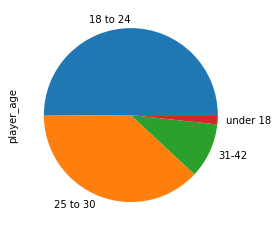

In [16]:
dfage.plot(kind='pie')
### Here we can see that more than 50% players is between 18-25 years
### 37% 25-10 years
### 10% is 31-42 years
### 0.017% is under 18 years

<AxesSubplot:>

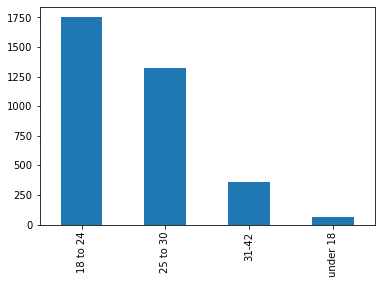

In [17]:
dfage.plot(kind='bar')

<AxesSubplot:ylabel='Rating'>

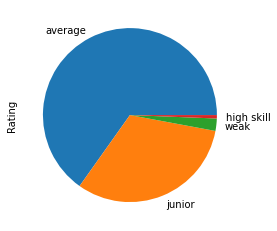

In [18]:
dfage = pd.cut(csv1["Rating"],bins=[0.6,0.8,0.95,1.2,1.5],labels=['weak','junior','average','high skill']).value_counts()
dfage
dfage.plot(kind='pie')

In [19]:
def get_kills_deaths_by_category(df):
    df1=df.copy()
    df1["kills_death_group"] = pd.cut(x=df['Kills_deaths'], bins=[0.57,0.9,1.1,1.51], labels=["bad k/d","good k/d","very good k/d"])
    return df1

In [20]:
def get_damage_in_round_by_category(df):
    df1=df.copy()
    df1['Damage_round_group']=pd.cut(x=df['Damage_in_Round'],bins=[36,55,74,100], labels=['> 36','> 55','> 74'])
    return df1

In [21]:
def get_rounds_by_category(df):
    df1=df.copy()
    df1['rounds_group']=pd.cut(x=df['Rounds_played'],bins=[400,10000,20000,30000,40000,50000,60000], labels=['0','1','2','3','4','5'])
    return df1

In [22]:
csv2 = get_kills_deaths_by_category(csv1)
csv2 = get_damage_in_round_by_category(csv2)
csv2 = get_rounds_by_category(csv2)

In [23]:
ct1 = pd.crosstab(csv2['Damage_round_group'],csv2['kills_death_group'],normalize='index')
#csv2['kills_death_group']
ct2 = pd.crosstab(csv2['rounds_group'],csv2['kills_death_group'],normalize='index')

<AxesSubplot:xlabel='Damage_round_group'>

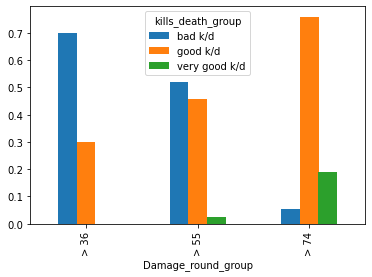

In [24]:
ct1.plot(kind='bar')

<AxesSubplot:xlabel='rounds_group'>

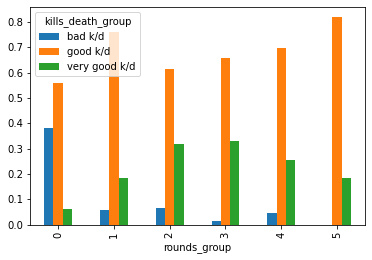

In [25]:
ct2.plot(kind='bar')

C:\Users\ravin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_age', ylabel='Rating'>

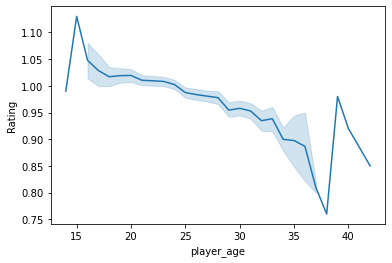

In [26]:
sns.lineplot(csv1["player_age"],csv1["Rating"])
#Here we can see that skill decreases with age

Text(0, 0.5, 'Maps played')

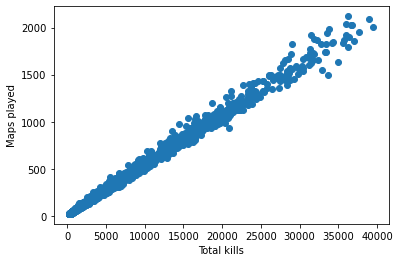

In [27]:
plt.scatter(csv1.Total_kills, csv1.Maps_played)
plt.xlabel("Total kills") #x label
plt.ylabel("Maps played") #y label

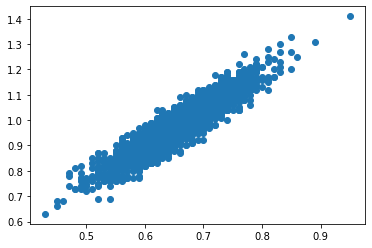

In [28]:
plt.scatter(csv1.Kills_in_round, csv1.Rating)

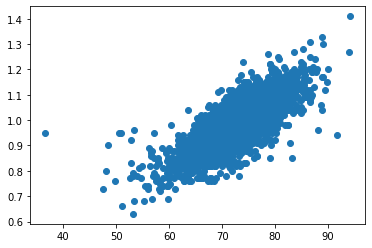

In [29]:
plt.scatter(csv1.Damage_in_Round, csv1.Rating)

In [30]:
#In 2 examples above we can see how different affect Damage in Round and Kills per round to Rating
# Kills in round affects more that Damage in round

Text(0, 0.5, 'Rating')

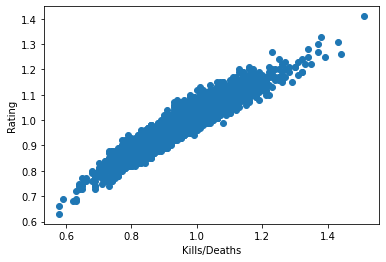

In [36]:
plt.scatter(csv1['Kills_deaths'], csv1.Rating) #We can see that if player wants to imrpove his rating he need to work on his K/D
plt.xlabel("Kills/Deaths") #x label
plt.ylabel("Rating") #y label

Text(0, 0.5, 'Rating')

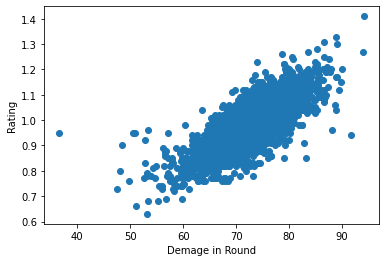

In [37]:
plt.scatter(csv1['Damage_in_Round'], csv1.Rating) ##Damage in round is also affect but it's less important than K/D his scatterplot more spreaded 
plt.xlabel("Demage in Round") #x label
plt.ylabel("Rating") #y label

Text(0, 0.5, 'Rating')

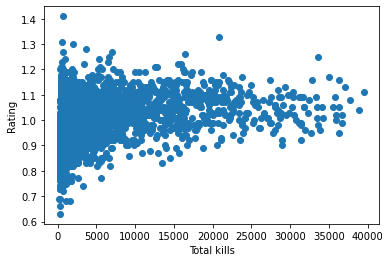

In [38]:
plt.scatter(csv1['Total_kills'], csv1.Rating) ## And what is interesting that only amount of kills not so important as well is KD
plt.xlabel("Total kills") #x label
plt.ylabel("Rating") #y label

In [39]:
#csv1.to_csv(r'C:\Users\ravin\OneDrive\Dokumente\לימודים\שנה ב\players_mp_is_20.complete.cleaned.csv')

## PREDICTION

In [32]:
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    return X_train, X_test, y_train, y_test

In [33]:
clf = LinearRegression()
X = csv1.drop(['Rating', 'player_name'], axis=1)
y = csv1['Rating']
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y, 0.3, 41)
class_model = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
resDF

,Actual,Predicted
1021,1.07,1.075476
3274,0.91,0.890008
1357,1.04,1.020105
601,1.09,1.091136
1306,0.99,1.012068
...,...,...
2317,1.02,0.979805
2209,0.95,0.992483
778,1.05,1.034411
3321,0.93,0.912835


In [34]:
evaluate_value = r2_score(y_test, y_pred)
evaluate_value

0.936111527353364